In [2]:
import tensorflow as tf
import pandas as pd
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.17.0


In [3]:
df = pd.read_csv('TMNIST_Data.csv')

In [4]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = df.drop(columns=['labels','names'])
y = df['labels']
classes = [0,1,2,3,4,5,6,7,8,9]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
X_train = X_train.reshape(23920,28,28)
X_test = X_test.reshape(5980,28,28)

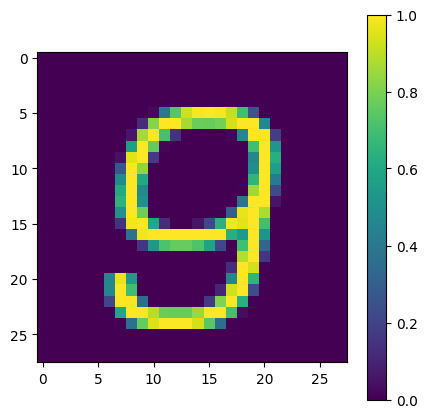

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

C:\Users\khodg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8872 - loss: 0.4417
Epoch 2/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9687 - loss: 0.1144
Epoch 3/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9780 - loss: 0.0847
Epoch 4/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9834 - loss: 0.0652
Epoch 5/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9855 - loss: 0.0552
Epoch 6/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9882 - loss: 0.0454
Epoch 7/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9899 - loss: 0.0373
Epoch 8/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9911 - loss: 0.0321
Epoch 9/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9924 - loss: 0.0265
Epoch 10/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9945 - loss: 0.0230


In [13]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()]) 

In [14]:
predictions = probability_model.predict(X_test)
y_test.head()

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step


15756    3
19617    5
18973    8
16397    9
16366    0
Name: labels, dtype: int64

In [15]:
predictions[0]

array([8.30800820e-19, 1.47149115e-15, 5.19017406e-14, 1.00000000e+00,
       6.41500123e-22, 2.70442783e-11, 6.21634502e-24, 1.65165977e-13,
       1.07203815e-10, 2.40895498e-10], dtype=float32)

In [16]:
classes[np.argmax(predictions[0])]

3